In [1]:
import librosa
import numpy as np
import pandas as pd
from sklearn import svm
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import csv


In [3]:
def extract_mfcc(audio_file):
    y,sr = librosa.load(audio_file)
    mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr).T, axis=0)
    np.set_printoptions(linewidth=500)
    return mfccs
def extract_cont(audio_file):
    y,sr = librosa.load(audio_file)
    cont = np.mean(librosa.feature.spectral_contrast(y=y).T)
    return cont
def extract_rolloff(audio_file):
    y,sr = librosa.load(audio_file)
    rollo = np.mean(librosa.feature.spectral_rolloff(y=y,sr=sr).T)
    return rollo
def extract_zcr1(audio_file):
    y,sr = librosa.load(audio_file)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T)
    return zcr
def extract_centr2(audio_file):
    y,sr = librosa.load(audio_file)
    centr = np.mean(librosa.feature.spectral_centroid(y=y,sr=sr).T)
    return centr
def extract_bandw2(audio_file):
    y,sr = librosa.load(audio_file)
    bandw = np.mean(librosa.feature.spectral_bandwidth(y=y,sr=sr).T)
    return bandw
def extract_ccens(audio_file):
    y,sr = librosa.load(audio_file)
    ccens = np.mean(librosa.feature.chroma_cens(y=y).T)
    return ccens
def extract_ccqt(audio_file):
    y,sr = librosa.load(audio_file)
    ccqt = np.mean(librosa.feature.chroma_cqt(y=y,sr=sr).T)
    return ccqt 
def extract_cstft(audio_file):
    y,sr = librosa.load(audio_file)
    cstft = np.mean(librosa.feature.chroma_stft(y=y).T)
    return cstft
def extract_cvqt(audio_file):
    y,sr = librosa.load(audio_file)
    cvqt = np.mean(librosa.feature.chroma_vqt(y=y,sr=sr,intervals='ji5').T)
    return cvqt

In [5]:
csv_file_training = 'trainingfor-orig.csv'
csv_file_validation = 'valideverything.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("zcr")
headerList.append("centr")
headerList.append("bandw")
headerList.append("contrast")
headerList.append("rolloff")
headerList.append("ccens")
headerList.append("ccqt")
headerList.append("cstft")
headerList.append("cvqt")
headerList.append("audio_type")
DIR = 'archive/for-original/for-original/training/fake/'

l = []
for f in tqdm(os.listdir(DIR)):
    try:
        for n in extract_mfcc(DIR+ f):
            l.append(n)

        l.append(extract_zcr1(DIR+ f))
        l.append(extract_centr2(DIR+ f))
        l.append(extract_bandw2(DIR+ f))
        l.append(extract_cont(DIR+ f))
        l.append(extract_rolloff(DIR+ f))
        l.append(extract_ccens(DIR+ f))
        l.append(extract_ccqt(DIR+ f))
        l.append(extract_cstft(DIR+ f))
        l.append(extract_cvqt(DIR+ f))
        l.append("fake")
        dataf.append(l)
    except Exception as e:
        print("error: ", e)
        continue
    l = []
DIR2 = 'archive/for-original/for-original/training/real/'
for f in tqdm(os.listdir(DIR2)):
    try:    
        for n in extract_mfcc(DIR2+ f):
            l.append(n)
        l.append(extract_zcr1(DIR2+ f))
        l.append(extract_centr2(DIR2+ f))
        l.append(extract_bandw2(DIR2+ f))
        l.append(extract_cont(DIR2+ f))
        l.append(extract_rolloff(DIR2+ f))
        l.append(extract_ccens(DIR2+ f))
        l.append(extract_ccqt(DIR2+ f))
        l.append(extract_cstft(DIR2+ f))
        l.append(extract_cvqt(DIR2+ f))
        l.append("real")
        dataf.append(l)
    except Exception as e:
        print("error: ", e)
        continue
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)

  0%|          | 0/26941 [00:00<?, ?it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(
  0%|          | 1/26941 [00:00<1:20:53,  5.55it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=769
  warnings.warn(
  0%|          | 2/26941 [00:00<1:22:12,  5.46it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(
c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=360
  warnings.warn(
  0%|          | 3/26941 [00:00<1:16:47,  5.85it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=707
  warnings.warn(
  0%|          | 4/26941 [00:00<1:18:29,  5.72it/s]c:\Python312\Lib\site-pac

error:  


 11%|█▏        | 3080/26941 [09:00<1:08:58,  5.77it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=786
  warnings.warn(
 12%|█▏        | 3108/26941 [09:05<1:10:21,  5.65it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1003
  warnings.warn(
c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=502
  warnings.warn(
 12%|█▏        | 3126/26941 [09:08<1:12:01,  5.51it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=771
  warnings.warn(
 12%|█▏        | 3182/26941 [09:18<1:11:24,  5.55it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=733
  warnings.warn(
 12%|█▏        | 3292/26941 [09:38<1:11:29,  5.51it/s

error:  


 19%|█▉        | 5207/26941 [15:19<1:08:44,  5.27it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=934
  warnings.warn(
c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=467
  warnings.warn(
 20%|█▉        | 5278/26941 [15:32<1:02:06,  5.81it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=834
  warnings.warn(
 20%|█▉        | 5280/26941 [15:32<1:01:54,  5.83it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=281
  warnings.warn(
 20%|█▉        | 5289/26941 [15:34<1:05:00,  5.55it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=970
  warnings.warn(
 20%|█▉        | 5325/26941 [15:41<1:08:33,  5.25it/s]

error:  


 22%|██▏       | 5957/26941 [17:33<1:02:50,  5.57it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=941
  warnings.warn(
c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=471
  warnings.warn(
 22%|██▏       | 6003/26941 [17:41<1:02:24,  5.59it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=352
  warnings.warn(
 22%|██▏       | 6009/26941 [17:42<1:07:31,  5.17it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=350
  warnings.warn(
 22%|██▏       | 6029/26941 [17:46<1:00:03,  5.80it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=628
  warnings.warn(
 22%|██▏       | 6032/26941 [17:46<56:44,  6.14it/s]  

error:  


 24%|██▍       | 6590/26941 [19:26<58:10,  5.83it/s]  c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=280
  warnings.warn(
 25%|██▍       | 6613/26941 [19:30<46:50,  7.23it/s]  

error:  


 25%|██▌       | 6786/26941 [20:01<57:13,  5.87it/s]  c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=356
  warnings.warn(
 26%|██▌       | 6903/26941 [20:22<1:00:38,  5.51it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=905
  warnings.warn(
 26%|██▋       | 7122/26941 [21:01<59:32,  5.55it/s]  c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=286
  warnings.warn(
 27%|██▋       | 7238/26941 [21:22<58:52,  5.58it/s]  c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=698
  warnings.warn(
 28%|██▊       | 7465/26941 [22:02<55:53,  5.81it/s]  c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=841
  warnings.warn(


error:  


 33%|███▎      | 8836/26941 [26:06<49:32,  6.09it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=564
  warnings.warn(
 33%|███▎      | 8859/26941 [26:10<55:59,  5.38it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=898
  warnings.warn(
 33%|███▎      | 8909/26941 [26:19<55:47,  5.39it/s]  c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=295
  warnings.warn(
 33%|███▎      | 8911/26941 [26:19<52:27,  5.73it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=619
  warnings.warn(
 33%|███▎      | 8996/26941 [26:34<52:42,  5.67it/s]  c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=541
  warnings.warn(
 34%|█

error:  


 58%|█████▊    | 15531/26941 [46:00<24:54,  7.64it/s]

error:  


 58%|█████▊    | 15694/26941 [46:29<26:01,  7.20it/s]

error:  


 60%|█████▉    | 16049/26941 [47:33<32:40,  5.55it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=843
  warnings.warn(
 60%|██████    | 16195/26941 [47:59<32:27,  5.52it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=266
  warnings.warn(
 61%|██████    | 16460/26941 [48:47<33:09,  5.27it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=615
  warnings.warn(
 62%|██████▏   | 16679/26941 [49:26<30:28,  5.61it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=490
  warnings.warn(
 64%|██████▍   | 17210/26941 [51:01<28:51,  5.62it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=653
  warnings.warn(
 64%|

error:  


 69%|██████▊   | 18516/26941 [54:55<19:52,  7.07it/s]

error:  


 72%|███████▏  | 19398/26941 [57:33<21:44,  5.78it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=688
  warnings.warn(
 74%|███████▎  | 19836/26941 [58:50<20:44,  5.71it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=330
  warnings.warn(
 74%|███████▍  | 19959/26941 [59:13<23:19,  4.99it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=395
  warnings.warn(
 75%|███████▌  | 20269/26941 [1:00:08<15:46,  7.05it/s]

error:  


 79%|███████▉  | 21417/26941 [1:03:33<17:12,  5.35it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=273
  warnings.warn(
 85%|████████▍ | 22864/26941 [1:07:52<09:19,  7.29it/s]

error:  


 85%|████████▌ | 23002/26941 [1:08:17<11:19,  5.79it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=929
  warnings.warn(
 93%|█████████▎| 24925/26941 [1:13:59<05:50,  5.76it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=216
  warnings.warn(
c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=256 is too large for input signal of length=216
  warnings.warn(
 93%|█████████▎| 24964/26941 [1:14:06<05:55,  5.56it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=228
  warnings.warn(
c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=256 is too large for input signal of length=228
  warnings.warn(
 99%|█████████▉| 26726/26941 [1:19:20<00:36,  5.97it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum

error:  


  0%|          | 79/26941 [00:18<1:39:20,  4.51it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=787
  warnings.warn(
  0%|          | 95/26941 [00:22<1:34:52,  4.72it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=932
  warnings.warn(
  0%|          | 119/26941 [00:27<1:42:08,  4.38it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(
  1%|          | 145/26941 [00:33<1:45:29,  4.23it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1019
  warnings.warn(
  1%|          | 220/26941 [00:50<1:41:14,  4.40it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1015
  warnings.warn(
  1%|

In [6]:
hdl = headerList[0:(len(headerList)-1)]
train_data = pd.read_csv("trainingfor-orig.csv")
x = train_data[hdl].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
svc = SVC()
svc.fit(X_train,y_train)

SVC()

[0 0 0 ... 0 0 1]
Model accuracy score with default hyperparameters: 0.9994
Confusion matrix

 [[5350    4]
 [   2 5418]]

True Positives(TP) =  5350

True Negatives(TN) =  5418

False Positives(FP) =  4

False Negatives(FN) =  2


<Axes: >

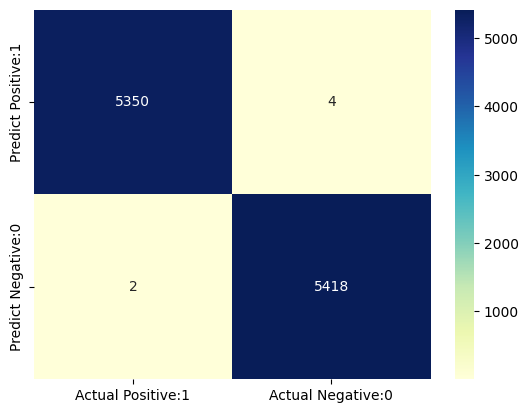

In [7]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'],)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')